In [1]:
import os
from PIL import Image
import pandas as pd
import numpy as np

In [10]:
img_path = '../data_dogbreed/train/000bec180eb18c7604dcecc8fe0dba07.jpg'

# Open the image
img = Image.open(img_path)

# Get the size (width, height) of the image
img_size = img.size

In [11]:
img_size

(500, 375)

In [48]:
def flatten_image(img_path):
    target_size = (64, 64)
    img = Image.open(img_path)  # Convert to grayscale
    resized_img = img.resize(target_size)
    img_array = np.array(resized_img)
    flattened_img = img_array.flatten()
    return flattened_img

In [148]:
folder_path = "../data_dogbreed/train/"

In [6]:
file_names = os.listdir(folder_path)

In [8]:
pixel_df = pd.DataFrame()

In [7]:
file_names

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '002211c81b498ef88e1b40b9abf84e1d.jpg',
 '00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '002a283a315af96eaea0e28e7163b21b.jpg',
 '003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '0042188c895a2f14ef64a918ed9c7b64.jpg',
 '004396df1acd0f1247b740ca2b14616e.jpg',
 '0067dc3eab0b3c3ef0439477624d85d6.jpg',
 '00693b8bc2470375cc744a6391d397ec.jpg',
 '006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 '0075dc49dab4024d12fafe67074d8a81.jpg',
 '00792e341f3c6eb33663e415d0715370.jpg',
 '007b5a16db9d9ff9d7ad39982703e429.jpg',
 '007b8a07882822475a4ce6581e70b1f8.jpg',
 '007ff9a78eba2aebb558afea3a51c469.jpg',
 '008887054b18ba3c7601792b6a453cc3.jpg',
 '008b1271ed1addaccf93783b39deab45.jpg',
 '008ba178d6dfc1a583617470d19c1673.jpg',
 '009509be3ca7cce0ff9e37c8b09b1125.jpg',
 '0097c6242c6f3071762d9f85c3ef1b2f.jpg',
 '00a338a92e4e7b

In [41]:
from matplotlib import image as mpimg

img = mpimg.imread('../data_dogbreed/train/000bec180eb18c7604dcecc8fe0dba07.jpg')  #for getting image data into matrix 
img = np.ravel(img)

In [42]:
df = pd.DataFrame([img])

In [49]:
columns = [f'pixel_{i}' for i in range(1, 64*64*3 +1)]  # Adjust based on image size and channels
pixel_df = pd.DataFrame(columns=columns)

# Loop through each file in the folder



# Loop through each file in the folder
for file in file_names:
    # Full path to the image
    img_path = os.path.join(folder_path, file)
            
            # Flatten image
    pixel_values = flatten_image(img_path)
            
            # Add pixel values as a new row to the DataFrame
    pixel_df.loc[len(pixel_df)] = pixel_values
    
    # Add a column with the names of the files


In [51]:
pixel_df.head()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287,pixel_12288
0,162,120,77,167,126,76,171,133,95,182,...,72,186,127,86,163,95,69,176,119,79
1,58,34,21,70,39,21,88,45,22,94,...,22,47,23,14,48,25,14,50,24,19
2,102,101,96,109,108,103,109,108,106,107,...,112,117,116,113,117,116,112,114,113,110
3,94,95,92,51,57,54,72,73,67,58,...,97,123,117,91,115,108,89,117,97,82
4,81,83,80,79,81,78,79,81,78,84,...,86,87,88,86,87,89,86,90,90,87


In [52]:
data_label = pd.read_csv("../data_dogbreed/labels.csv")

In [139]:
df_label = pd.DataFrame(data_label)

In [56]:
result_pixel_df = pd.concat([pixel_df, df_label], axis = 1)

In [57]:
result_pixel_df.head()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287,pixel_12288,id,breed
0,162,120,77,167,126,76,171,133,95,182,...,127,86,163,95,69,176,119,79,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,58,34,21,70,39,21,88,45,22,94,...,23,14,48,25,14,50,24,19,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,102,101,96,109,108,103,109,108,106,107,...,116,113,117,116,112,114,113,110,001cdf01b096e06d78e9e5112d419397,pekinese
3,94,95,92,51,57,54,72,73,67,58,...,117,91,115,108,89,117,97,82,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,81,83,80,79,81,78,79,81,78,84,...,88,86,87,89,86,90,90,87,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [58]:
result_pixel_df.columns

Index(['pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5', 'pixel_6',
       'pixel_7', 'pixel_8', 'pixel_9', 'pixel_10',
       ...
       'pixel_12281', 'pixel_12282', 'pixel_12283', 'pixel_12284',
       'pixel_12285', 'pixel_12286', 'pixel_12287', 'pixel_12288', 'id',
       'breed'],
      dtype='object', length=12290)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [60]:
result_pixel_df.drop(['id'], axis =1, inplace= True)

In [61]:
result_pixel_df.columns

Index(['pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5', 'pixel_6',
       'pixel_7', 'pixel_8', 'pixel_9', 'pixel_10',
       ...
       'pixel_12280', 'pixel_12281', 'pixel_12282', 'pixel_12283',
       'pixel_12284', 'pixel_12285', 'pixel_12286', 'pixel_12287',
       'pixel_12288', 'breed'],
      dtype='object', length=12289)

In [62]:
features = result_pixel_df.drop('breed', axis=1)  # Features
target = result_pixel_df['breed']

In [67]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(target)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(features, y_encoded, test_size=0.2, random_state=42)

In [88]:
pipeline = Pipeline([
     # Encode string labels
    ('scaler', StandardScaler()),  # Optional: Include a scaler if needed
      # Adjust n_components as needed
    ('classifier', LogisticRegression(max_iter= 100))
])

In [89]:
pipeline.fit(X_train, y_train)

C:\Users\marja\conda\envs\myapi\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [90]:
y_pred = pipeline.predict(X_test)

In [104]:
y_pred


array([75, 30, 62, ..., 90, 32, 15])

In [91]:
y_pred_decoded = label_encoder.inverse_transform(y_pred)

In [92]:
y_pred_decoded

array(['miniature_pinscher', 'chow', 'keeshond', ...,
       'rhodesian_ridgeback', 'cocker_spaniel', 'bluetick'], dtype=object)

array([111,  56,  97, ...,  56,  49,  67])

In [99]:
y_test_decoded = label_encoder.inverse_transform(y_test)

In [102]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [103]:
accuracy

0.03960880195599022

#### Using CNN

In [140]:
df_label['breed'].nunique()

120

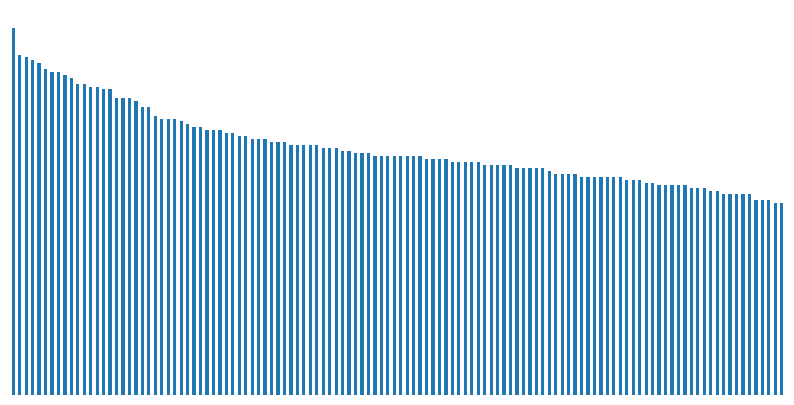

In [141]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5)) 
df_label['breed'].value_counts().plot.bar() 
plt.axis('off') 
plt.show() 

In [149]:
df_label['filepath'] = folder_path + df_label['id'] + '.jpg'
df_label.head() 

,id,breed,filepath
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,../data_dogbreed/train/000bec180eb18c7604dcecc...
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,../data_dogbreed/train/001513dfcb2ffafc82cccf4...
2,001cdf01b096e06d78e9e5112d419397,pekinese,../data_dogbreed/train/001cdf01b096e06d78e9e51...
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,../data_dogbreed/train/00214f311d5d2247d5dfe4f...
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,../data_dogbreed/train/0021f9ceb3235effd7fcde7...


In [150]:
import cv2


def read_and_resize_image_rgb(file_path):
    img = cv2.imread(file_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img_rgb_resized = cv2.resize(img_rgb, (224, 224))
    return img_rgb_resized

In [130]:
filename = df_label['filepath'][0].strip()

In [131]:
filename

'../data_dogbreed/train000bec180eb18c7604dcecc8fe0dba07.jpg'

In [138]:
resized_img = read_and_resize_image_rgb("../data_dogbreed/train000bec180eb18c7604dcecc8fe0dba07.jpg")

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [146]:
for i in df_label['filepath']:
    print(i)

../data_dogbreed/train000bec180eb18c7604dcecc8fe0dba07.jpg
../data_dogbreed/train001513dfcb2ffafc82cccf4d8bbaba97.jpg
../data_dogbreed/train001cdf01b096e06d78e9e5112d419397.jpg
../data_dogbreed/train00214f311d5d2247d5dfe4fe24b2303d.jpg
../data_dogbreed/train0021f9ceb3235effd7fcde7f7538ed62.jpg
../data_dogbreed/train002211c81b498ef88e1b40b9abf84e1d.jpg
../data_dogbreed/train00290d3e1fdd27226ba27a8ce248ce85.jpg
../data_dogbreed/train002a283a315af96eaea0e28e7163b21b.jpg
../data_dogbreed/train003df8b8a8b05244b1d920bb6cf451f9.jpg
../data_dogbreed/train0042188c895a2f14ef64a918ed9c7b64.jpg
../data_dogbreed/train004396df1acd0f1247b740ca2b14616e.jpg
../data_dogbreed/train0067dc3eab0b3c3ef0439477624d85d6.jpg
../data_dogbreed/train00693b8bc2470375cc744a6391d397ec.jpg
../data_dogbreed/train006cc3ddb9dc1bd827479569fcdc52dc.jpg
../data_dogbreed/train0075dc49dab4024d12fafe67074d8a81.jpg
../data_dogbreed/train00792e341f3c6eb33663e415d0715370.jpg
../data_dogbreed/train007b5a16db9d9ff9d7ad39982703e429.j

In [152]:
resized_images = []
for filename in df_label['filepath']:
    
    resized_img = read_and_resize_image_rgb(filename)
    resized_images.append(resized_img)
resized_images_array = np.array(resized_images)

In [153]:
from tensorflow.python.keras.utils.np_utils import to_categorical

label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(df_label['breed'])
new_labels = to_categorical(label_encoded)

In [154]:
X = resized_images_array
y = new_labels

In [159]:
from tensorflow.keras.layers import GlobalAveragePooling2D, concatenate, Input
from tensorflow.keras.models import Model

In [160]:
def get_features(model_name, model_preprocessor, input_size, data):
    input_layer = Input(input_size)
    preprocessor = model_preprocessor(input_layer)
    base_model = model_name(weights='imagenet', include_top=False, input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs=input_layer, outputs=avg)
    feature_maps = feature_extractor.predict(data, verbose=1)
    print('Feature maps shape:', feature_maps.shape)
    return feature_maps

In [166]:
import tensorflow
from tensorflow.keras.applications import ResNet50

In [167]:
resnet_preprocessor = tensorflow.keras.applications.resnet50.preprocess_input
resnet_features = get_features(ResNet50, resnet_preprocessor, (224, 224, 3), X)

320/320 [==============================] - 444s 1s/step
Feature maps shape: (10222, 2048)


In [168]:
from tensorflow.python.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
model = Sequential()
model.add(Dropout(0.5, input_shape=(resnet_features.shape[1],)))
model.add(Dense(120, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [169]:
from tensorflow.python.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [171]:
history = model.fit(resnet_features, y,
                    batch_size=128,
                    epochs=100,
                    validation_split=0.15,
                    callbacks=[early_stopping])

Epoch 1/100
68/68 [==============================] - 1s 10ms/step - loss: 0.1880 - accuracy: 0.9467 - val_loss: 0.7095 - val_accuracy: 0.7907
Epoch 2/100
68/68 [==============================] - 1s 9ms/step - loss: 0.1771 - accuracy: 0.9510 - val_loss: 0.7174 - val_accuracy: 0.7920
Epoch 3/100
68/68 [==============================] - 1s 10ms/step - loss: 0.1676 - accuracy: 0.9529 - val_loss: 0.7157 - val_accuracy: 0.7862
Epoch 4/100
68/68 [==============================] - 1s 9ms/step - loss: 0.1585 - accuracy: 0.9549 - val_loss: 0.7222 - val_accuracy: 0.7881
Epoch 5/100
68/68 [==============================] - 1s 9ms/step - loss: 0.1499 - accuracy: 0.9587 - val_loss: 0.7259 - val_accuracy: 0.7940
Epoch 6/100
68/68 [==============================] - 1s 9ms/step - loss: 0.1435 - accuracy: 0.9591 - val_loss: 0.7187 - val_accuracy: 0.7907
Epoch 7/100
68/68 [==============================] - 1s 8ms/step - loss: 0.1335 - accuracy: 0.9635 - val_loss: 0.7271 - val_accuracy: 0.7829
Epoch 8/100

In [177]:
test_path = "../data_dogbreed/test/"
img_test_files = os.listdir(test_path)[:8]

In [179]:
img_test_files

['000621fb3cbb32d8935728e48679680e.jpg',
 '00102ee9d8eb90812350685311fe5890.jpg',
 '0012a730dfa437f5f3613fb75efcd4ce.jpg',
 '001510bc8570bbeee98c8d80c8a95ec1.jpg',
 '001a5f3114548acdefa3d4da05474c2e.jpg',
 '00225dcd3e4d2410dd53239f95c0352f.jpg',
 '002c2a3117c2193b4d26400ce431eebd.jpg',
 '002c58d413a521ae8d1a5daeb35fc803.jpg']

In [174]:
breeds = sorted(df_label["breed"].unique().tolist())
class_to_num = dict(zip(breeds, range(len(breeds))))